<a href="https://colab.research.google.com/github/alexander-miller-02/alexander-miller-02.github.io/blob/main/rolling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2-210191660.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  thick['t_stamp'] = pd.to_datetime(thick['t_stamp'])


Text(0.5, 1.0, 'Thickness at HiPot')

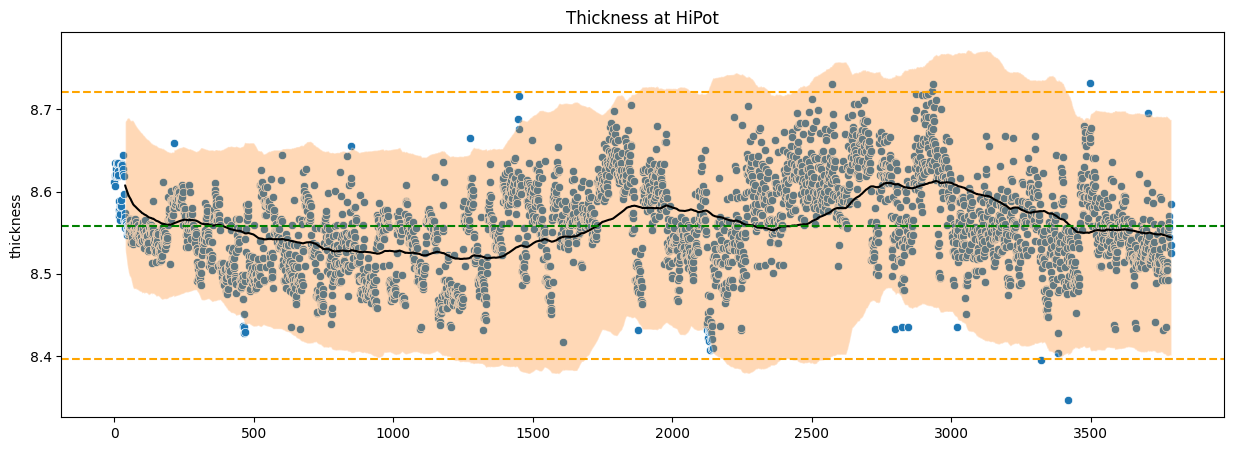

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.core.window.rolling import Rolling
import numpy as np



thick=pd.read_csv("/thickness.csv")
thick['t_stamp'] = pd.to_datetime(thick['t_stamp'])

thick = thick[thick['t_stamp']>pd.to_datetime("6/26/2025")]

thick = thick[::-1]

index = [i for i in range(len(thick['thickness']))]

window = 500

roll_mean = pd.Series(thick['thickness'].rolling(window=window, min_periods=40).mean())
roll_std = pd.Series(thick['thickness'].rolling(window=window, min_periods=40).std())

fig, ax = plt.subplots(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.scatterplot(x=index,y=thick['thickness'], ax=ax)
sns.lineplot(x=index, y=roll_mean, ax=ax, color='black')
plt.fill_between(x=index, y1=roll_mean+3*roll_std, y2=roll_mean-3*roll_std, alpha=0.3)
plt.axhline(y=np.mean(thick['thickness']), color='green', linestyle='--')
plt.axhline(y=np.mean(thick['thickness'])+3*np.std(thick['thickness']), color='orange', linestyle='--')
plt.axhline(y=np.mean(thick['thickness'])-3*np.std(thick['thickness']), color='orange', linestyle='--')
ax.set_title("Thickness at HiPot")

